In [1]:
import drawsvg as dw
%load_ext jhmagics

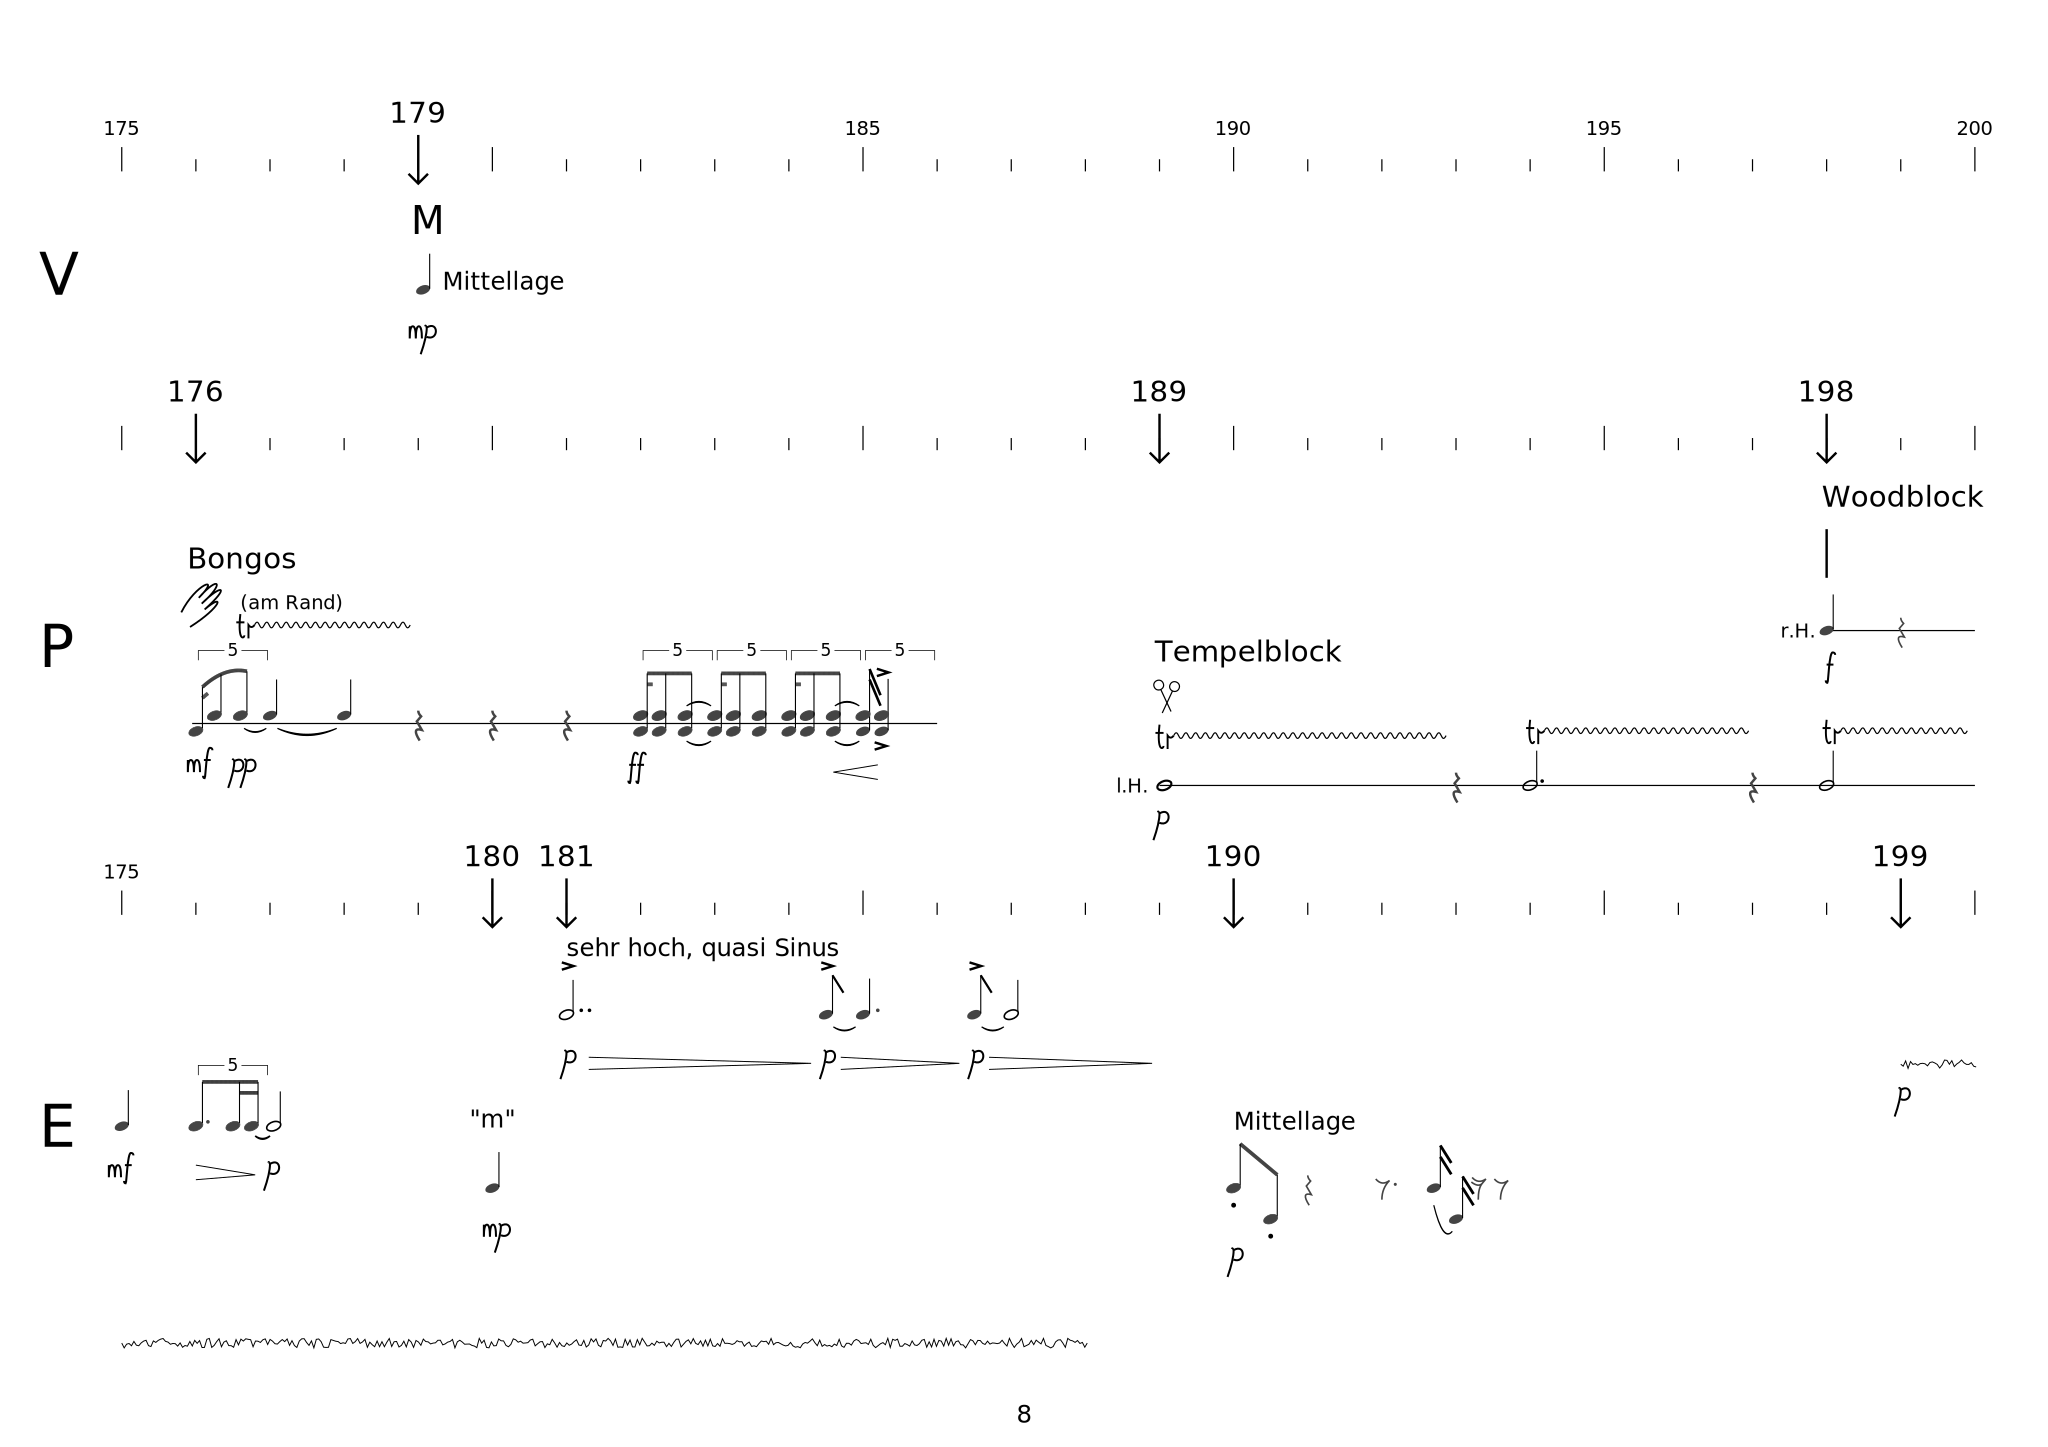

In [174]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# seitenzahl
seite = 8
d.append(dw.Text('%d'%seite,10,w/2,h-10,text_anchor='middle'))

# page settings
xnum,ynum = 26,22 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 50,30,30,30
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

# load own functions
from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# custom functions for xgrid and ygrid for this page
def xg(indx):
    return xgrid(indx,tm0)
def yg(indx):
    return ygrid(indx)
    
# raster am rand zur orientierung
#showGridOnMargins()
#showWritingSpace()

# zeitleisten und instrumente links
tm0 = 175  # zeit am anfang dieser seite
off = 15 # offset für die striche
 # normale zahlen in V P E
norm = [[175,185,190,195,200],[],[175]]
 # events in V P E
event = [[179],[176,189,198],[180,181,190,199]]
 # ygrid positionen für die leisten
yleisten = [1,5.5,13]
 # instrumente 
insnamen = ['V','P','E']
ytimeplus = [*yleisten,ynum-1]
yposinsnamen = [ytimeplus[i]+(ytimeplus[i+1]-ytimeplus[i])/2 for i in range(3)]
 # write out
for l in range(3):
    y = ygrid(yleisten[l])
    text(insnamen[l],xgrid(0)-34,ygrid(yposinsnamen[l]),24,dominant_baseline='middle')
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.5)
        else: vline(x,y+off,-5,sw=.5)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,8,text_anchor='middle')
        elif (i+tm0) in event[l]:
            text('%d'%(i+tm0),x,y-5,12,text_anchor='middle')
            arrow(x,y,20,4)

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

            
################# VOICE #################

 # M
x = xg(179)
ygindxvtop = yleisten[0]+.8
ygindxtext = ygindxvtop+.8 #text baseline
text('M',x-3,yg(ygindxtext),16)
y = yg(ygindxvtop+1.7)
not4tel(x+2,y,nothals,notsiz)
text('Mittellage',x+10,y,10,font_family='Cantarell Light')
yy = y+20
mezzopiano(x,yy,dynsiz)



################# PERCUSSION #################

 # linien und instrumente
ypercindx = yleisten[1]
ylbong = ypercindx+5
yltemp = ypercindx+6
ylwood = ypercindx+3.5
startends = [175.95,186,189,200,198,200] 
insnamen = ['Bongos','Tempelblock','Woodblock']
yoffsetins = [2.5,2,2] #abstand der namen von den linien
for i,yl in enumerate([ylbong,yltemp,ylwood]):
    y = yg(yl)
    x1 = xg(startends[i*2])
    x2 = xg(startends[i*2+1])
    line(x1,y,x2,y,stroke_width=0.5)
    text(insnamen[i],x1-2,yg(yl-yoffsetins[i]),12,font_family='Cantarell')
    if i==1: text('l.H.',x1-5,y,8,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
    if i==2: text('r.H.',x1-5,y,8,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
    
 # bongos
y = yg(ylbong)
y0 = y+notsiz/2+1 #tief
y1 = y-notsiz/2-1 #hoch
yschrift = yg(ylbong-yoffsetins[0])
x = xg(176)
hand(x,yschrift+18)
gruppe([x,y0,xg(176.25),y1,xg(176.6),y1],[2,1,1],y_space=notsiz,cp_x=0,cp_y_shift=.5)
yy = y-30
nlets(xg(176),yy,xg(177),yy,text='5')
yy = y+2
tie(xg(176.65),yy,xg(176.95),yy,1.5,.5)
not4tel(xg(177),y1,nothals,notsiz)
tie(xg(177.1),yy,xg(177.9),yy,1,.5)
not4tel(xg(178),y1,nothals,notsiz)
triller(xg(176.6),y-35,xg(178.9))
text('(am Rand)',xg(176.6),y-47,8,font_family='Cantarell Light')
paus4tel(xg(179),y,pausiz,1.5)
paus4tel(xg(180),y,pausiz,1.5)
paus4tel(xg(181),y,pausiz,1.5)

x182ff = [xg(i) for i in (182,182.25,182.6,183,183.25,183.6,184,184.25,184.6)]
xy182oben,xy182unten = [],[]
for i in x182ff:
    note(i,y1,notsiz,c='#444',fill='#444')
    xy182unten.extend([i,y0])
gruppe(xy182unten[:6],[2,1,1],y_space=notsiz,dirlen=2)
gruppe(xy182unten[6:12],[2,1,1],y_space=notsiz,dirlen=2)
gruppe(xy182unten[12:],[2,1,1],y_space=notsiz,dirlen=2)
not16tel(xg(185),y0,nothals*1.5,notsiz,swflagfac=1.2)
not4tel(xg(185.25),y0,nothals*1.5,notsiz)
note(xg(185),y1,notsiz,c='#444',fill='#444')
note(xg(185.25),y1,notsiz,c='#444',fill='#444')

accent(xg(185.25),y-21,6)
accent(xg(185.22),y0+6,6)
tie(xg(182.62),y0+4,xg(182.95),y0+4,1.5,.5)
tie(xg(182.62),y1-4,xg(182.95),y1-4,-1.5,.5)
tie(xg(184.62),y0+4,xg(184.95),y0+4,1.5,.5)
tie(xg(184.62),y1-4,xg(184.95),y1-4,-1.5,.5)
yy = y-30
nlets(xg(182),yy,xg(183),yy,num=4,text='5')

yy = y+20
mezzoforte(x,yy,dynsiz)
pianissimo(xg(176.6),yy,dynsiz)
fortissimo(xg(181.9),yy+2,dynsiz)
cresc(xg(184.6),yy,xg(185.2),yy,6)

 # tempelblock
y = yg(yltemp)
yy = y-15
yschrift = yg(yltemp-yoffsetins[0])
x = xg(189)
perc2SoftMallets(x+3,yschrift+22)
not1tel(x+2,y,notsiz)
triller(x,yy,xg(192.9))
paus4tel(xg(193),y,pausiz,1.5)
not2tel(xg(194),y,nothals,notsiz,dotted=1)
triller(xg(194),yy-2,xg(196.9))
paus4tel(xg(197),y,pausiz,1.5)
not2tel(xg(198),y,nothals,notsiz)
triller(xg(198),yy-2,xg(199.9))
piano(x,y+16,dynsiz)

 # woodblock
y = yg(ylwood)
yy = y-15
yschrift = yg(ylwood-yoffsetins[0])
x = xg(198)
percStricknadel(x,yschrift+22)
not4tel(x,y,nothals,notsiz)
paus4tel(xg(199),y,pausiz)
forte(x,y+19,dynsiz)


################# ELEKTRONIK #################

 # von 174
x = xg(175)
y = yg(17)
not4tel(x,y,nothals,notsiz)
gruppe([xg(176),y,xg(176.5),y,xg(176.75),y],[1,2,2],[1,0,0],y_space=notsiz)
tie(xg(176.8),y+4,xg(177),y+4,1.8,.7)
not2tel(xg(177.05),y,nothals,notsiz)
yy = y-25
nlets(xg(176),yy,xg(177),yy,text='5')
yy = y+20
mezzoforte(x-2,yy+1,dynsiz)
dim(xg(176),yy-1,xg(176.8),yy,6)
piano(xg(177),yy,dynsiz)

 # von 173
x = xg(175)
y = yg(20.5)
kratzgliss(x,y,xg(188),y,h=2)

 # 180
y = yg(18)
x = xg(180)
text('"m"',x,y-25,10,font_family='Cantarell Light',text_anchor='middle')
mezzopiano(x,y+20,dynsiz)
not4tel(x,y,nothals,notsiz)

 # 181
y = yg(15.2)
x = xg(181)
text('sehr hoch, quasi Sinus',x,y-24,10,font_family='Cantarell Light')
not2tel(x,y,nothals,notsiz,dotted=2,dotspace=1.5)
accent(x,y-20,6)
not8tel(xg(184.5),y,nothals,notsiz)
accent(xg(184.5),y-20,6)
yy = y+5
tie(xg(184.6),yy,xg(184.9),yy,1.5,.5)
not4tel(xg(185),y,nothals,notsiz,dotted=1,dotspace=1.5)
not8tel(xg(186.5),y,nothals,notsiz)
accent(xg(186.5),y-20,6)
tie(xg(186.6),yy,xg(186.9),yy,1.5,.5)
not2tel(xg(187),y,nothals,notsiz)
yy = y+20
piano(x,yy,dynsiz)
dim(xg(181.3),yy,xg(184.3),yy,5)
piano(xg(184.5),yy,dynsiz)
dim(xg(184.7),yy,xg(186.3),yy,5)
piano(xg(186.5),yy,dynsiz)
dim(xg(186.7),yy,xg(188.9),yy,5)

 # 190
y = yg(18)
y1 = y+yunit/2
x = xg(190)
text('Mittellage',x,y-24,10,font_family='Cantarell Light')
piano(x,y+30,dynsiz)
gruppe([x,y,xg(190.5),y1],1,y_space=notsiz)
dot(x,y+7,1)
dot(xg(190.5),y1+7,1)
paus4tel(xg(191),y,pausiz)
paus8tel(xg(192),y,pausiz,dotted=1,dotspace=1.5)
not16tel(xg(192.7),y,nothals,notsiz,swflagfac=1.3)
not16tel(xg(193),y1,nothals,notsiz,swflagfac=1.3)
tie(xg(192.7),y+7,xg(192.95),y1+5,10,.5,thick=.1)
paus16tel(xg(193.3),y,pausiz)
paus8tel(xg(193.6),y,pausiz)

 # 199
y = yg(16)
x = xg(199)
kratzgliss(x,y,xg(200),y,h=2)
yy = y+15
piano(x,yy,dynsiz)

d.set_pixel_scale(4)
d.save_png('partitur_%02d.png'%seite)
d.save_svg('partitur_%02d.svg'%seite)
d

In [135]:
help(gruppe)

Help on function gruppe in module __main__:

gruppe(notlist=[10, 60, 40, 50, 60, 120], balken=1, dotlist=0, balkdick=1, balkspace=1, balklen=1, dirlen=1.5, y_space=10, swfac=1, swfac_head=1, c='black', dotspace=1, dotsiz=1, fill=True, cp_x=0.5, cp_y_shift=0, resolution=100, **args)
    eine gruppe von noten unter einem oder mehreren balken.
        der balken wird als quadratische bezierkurve gezogen; der kontrollpunkt kann
        mit cp_x und cp_y_shift modifiziert werden.
    INPUT:
    notlist: liste mit x,y werten der einzelnen noten
    balken: entweder zahl für die anzahl der balken
        oder liste: wie viele balken bei jeder note (negativ = nach links)
    dotlist: entweder zahl (default 0 = keine)
        oder liste mit zahlen für punktierung jeder einzelnen note 
    balkdick: dicke der balken als relation zum y_space (1 = y_space/3)
    balkspace: abstand zwischen zwei balken als relation zur dicke (1 = dicke*2)
        entweder zahl oder liste für jede note
    balklen: 